In [ ]:
#Polytrope EOS

In [ ]:
r0=10
pi=3.14
h=10

In [ ]:
k= 5.38*(10**9)
gamma= 1.667


In [ ]:
G= 6.67430*(10**(-8))
c= 2.99792458*10**10

In [ ]:
epsilon_c=1*10**15

In [ ]:
m0= (4/3)*pi*(r0**3)
m0

4186.666666666667

In [ ]:
m=m0

In [ ]:
def dmdr(r, m):
    return 4*pi*(r**2)*epsilon(r,p)



In [ ]:
def mrk4(r, m, h):

  for i in range(1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dmdr(r, m)
        k2 = h * dmdr(r + 0.5 * h, m + 0.5 * k1)
        k3 = h * dmdr(r + 0.5 * h, m + 0.5 * k2)
        k4 = h * dmdr(r + h, m + k3)

        # Update next value of y
        mnew = m + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        # to print
       # print(r,m,h,rnew,mnew)

        # for next step
        r=rnew
        m=mnew

  return mnew

In [ ]:
p0= k*(epsilon_c)**gamma

In [ ]:
def epsilon(r,p):

  if(r==10):
    epsilon=epsilon_c

  else:
    epsilon=(p/k)**(1.00/gamma)

  return epsilon


In [ ]:
def dpdr(r, p):
  term1= -((G*m)/(r**2))
  term2= epsilon(r,p)
  term3= 1+(p/(epsilon(r,p)*(c**2)))
  term4= 1+(((4*pi*(r**3)*p))/(m*(c**2)))
  term5= 1-((2*G*m)/(r*(c**2)))
  return (term1*term2*term3*term4)/term5


In [ ]:
number=2000000

def rk4(r0, p0, h):
    r=r0
    global p
    p=p0

    global m

    for i in range (1, number):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dpdr(r, p)
        k2 = h * dpdr(r + 0.5 * h, p + 0.5 * k1)
        k3 = h * dpdr(r + 0.5 * h, p + 0.5 * k2)
        k4 = h * dpdr(r + h, p + k3)

        # Update next value of y
        pnew = p + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        r=rnew
        p=pnew

        epsilon_new=(pnew/k)**(1.0/gamma)

        mnew=mrk4(r,m,h)

        m=mnew

        if(pnew < 0.00):
          break



        # to print
        f=open('output.txt','a')
        print(rnew,epsilon_new,pnew,mnew)
        f.write("{} {} {} {} \n".format(rnew,epsilon_new,pnew,mnew))
        f.close()





    return pnew



In [ ]:
rk4(r0,p0,h)

Streaming output truncated to the last 5000 lines.
1252580 4558714118398.329 6.808829928383617e+30 1.5030285488899466e+33
1252590 4557287093413.446 6.805277282156266e+30 1.5030294469748074e+33
1252600 4555860242009.404 6.801725809852224e+30 1.50303034479282e+33
1252610 4554433564193.63 6.798175511296595e+30 1.5030312423440096e+33
1252620 4553007059973.55 6.794626386314488e+30 1.5030321396284016e+33
1252630 4551580729356.598 6.791078434731014e+30 1.5030330366460214e+33
1252640 4550154572350.208 6.787531656371282e+30 1.5030339333968944e+33
1252650 4548728588961.819 6.783986051060408e+30 1.503034829881046e+33
1252660 4547302779198.876 6.780441618623507e+30 1.503035726098501e+33
1252670 4545877143068.822 6.776898358885699e+30 1.5030366220492855e+33
1252680 4544451680579.109 6.773356271672102e+30 1.5030375177334245e+33
1252690 4543026391737.188 6.76981535680784e+30 1.5030384131509435e+33
1252700 4541601276550.518 6.766275614118036e+30 1.5030393083018678e+33
1252710 4540176335026.557 6.76273

TypeError: ignored

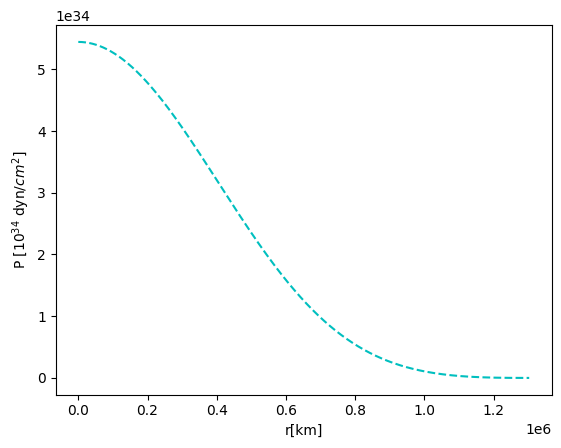

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 2]
plt.xlabel('r[km]')
plt.ylabel('P [$10^{34}$ dyn/$cm^{2}$]')
plt.plot(x, y,'c--')
plt.show()

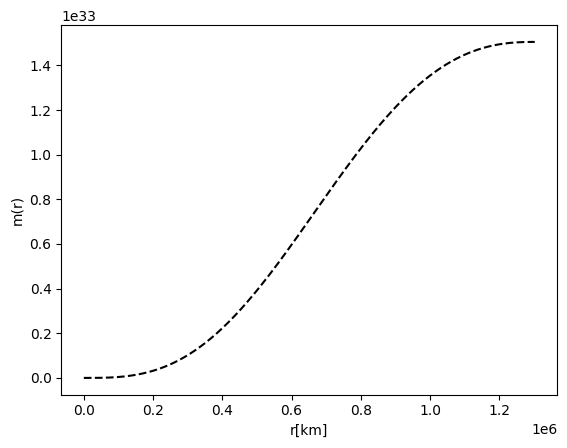

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 3]
plt.xlabel('r[km]')
plt.ylabel('m(r)')         # 1 solar mass = 2*10^33 grams
plt.plot(x, y,'k--')
plt.show()

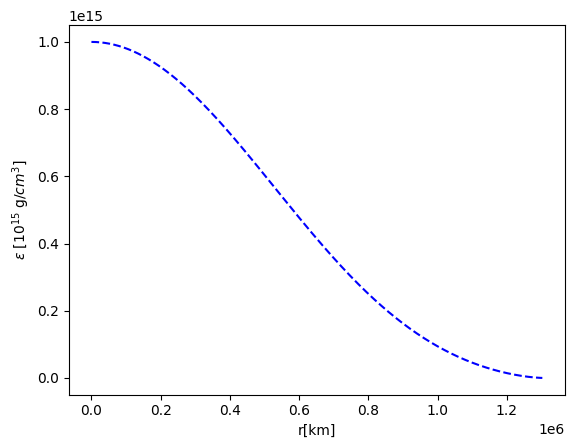

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 1]
plt.xlabel('r[km]')
plt.ylabel('$\epsilon$ [$10^{15}$ g/$cm^{3}$]')
plt.plot(x, y,'b--')
plt.show()